Experiment 1: Servomechanism Control

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

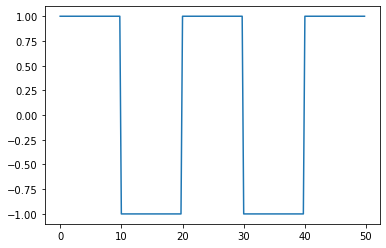

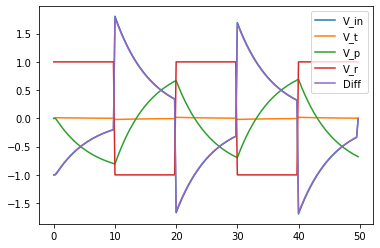

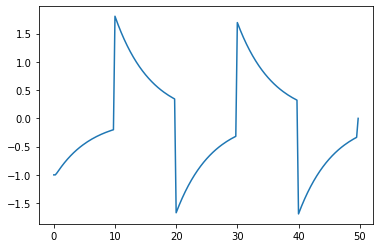

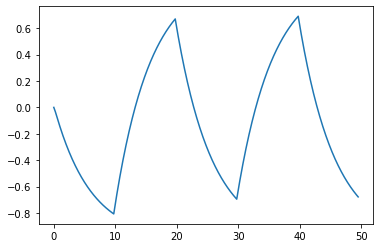

In [48]:
## Prelab Simulation ##

def tachoOutputVoltage(k_t, dTheta):
    return k_t * dTheta

def motorTorque(k_1, V_in, k_2, dTheta):
    return k_1*(V_in - k_2*dTheta)

def calculate_V_in(V_r, V_p, r_1):
    return -1*(V_r+V_p)*r_1

def motorVoltage(k_t,k_m,V_in,c,t):
    return (-1*k_t*k_m*V_in)*(1-math.exp(-1*c*t))/(30*c)

# Define metric arrays and time step parameters
dt = 0.25
tEnd = 50
timeSteps = np.arange(0,tEnd,dt)
V_t = np.zeros(len(timeSteps))
V_in = np.zeros(len(timeSteps))
V_p = np.zeros(len(timeSteps))
theta = np.zeros(len(timeSteps))

# Define constant parameters
k_t = 2
k_m = 1
c = 6

# Try square wave as well as constant reference voltage
V_r = np.array([1 if math.floor(0.1 * t) % 2 == 0 else -1 for t in timeSteps])
V_r_const = 4


plt.plot(timeSteps, V_r)
plt.show()

# Iterate through time steps
for t in range(len(timeSteps[:-1])):
    
    vr = V_r[t]
    V_in[t] = calculate_V_in(V_r[t], V_p[t], 1)
    V_t[t] = motorVoltage(k_t,k_m,V_in[t],c,t)

    # Calculate angular velocity
    dTheta = ((k_m*V_in[t])/c)*(1-math.exp(-1*c*timeSteps[t]))

    if(t == 0):
        theta[t] = 0 + dTheta*dt
    else:
        theta[t] = theta[t-1] + dTheta*dt

    V_p[t+1] = theta[t]

    #print(timeSteps[t],V_p[t],V_in[t],V_t[t], theta[t], dTheta)
    

    #if(t > len(timeSteps)/2):
        #V_r_const = -4

V_diff = np.add(V_t,V_in)

plt.plot(timeSteps,V_in, label = "V_in")
plt.plot(timeSteps,V_t, label = "V_t")
plt.plot(timeSteps,V_p, label = "V_p")
plt.plot(timeSteps,V_r, label = "V_r")
plt.plot(timeSteps, V_diff, label = "Diff")
plt.legend()
plt.show()

plt.plot(timeSteps,V_in, label = "V_in")
plt.show()

plt.plot(timeSteps[:-1], theta[:-1])

 # Task 1

#### [ Lab Session: 2021-09-23 - 3:30 PM]

 ## Objective

 Verify that the operational amplifiers for this experiment are functional and can add and subtract voltages



 ## Theoretical statements to be tested

 In theory, the output voltage from the operational amplifier OU150A should be governed by the equation: V0 = -(R2/R1)*(V1+V2). Since R1=R2, this becomes V0 = -(V1+V2).

 To test this, we will try three different combinations from the power supply, and measure the output voltage:
    1. V1 = 15V, V2 = -15V
    2. V1 = 15V, V2 = 0V
    3. V1 = 0V, V2 = -15V


## Experiment Observations

### Experiment 1 Statistics

Mean (Channel 1): 15.246
Std (Channel 1): 0.001

Mean (Channel 2): -14.578
Std (Channel 2): 0.001

Mean (Channel 3): -0.723
Std (Channel 3): 0.001


### Experiment 2 Statistics

Mean (Channel 1): 15.246
Std (Channel 1): 0.001

Mean (Channel 2): -0.002
Std (Channel 2): 0.001

Mean (Channel 3): -11.772
Std (Channel 3): 0.001


### Experiment 3 Statistics

Mean (Channel 1): -0.001
Std (Channel 1): 0.001

Mean (Channel 2): -14.579
Std (Channel 2): 0.001

Mean (Channel 3): 13.771
Std (Channel 3): 0.001



## Analysis

From our three seperate experiments we can notice a few important characteristics:
- We can confidently verifty that the OU150A with negative feedback has the property V0 = -(V1 + V2)
- It appears that the output never fully reaches +/- 15V. This could be a limitation of the amplifier
- The negative output appears to be "clipped" at a lower absolute voltage than the positive output case
    - Here we are comparing 13.771 V (positive case), against -11.772 V (negative case)

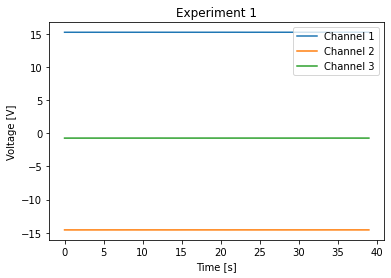

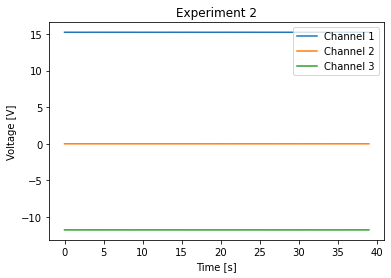

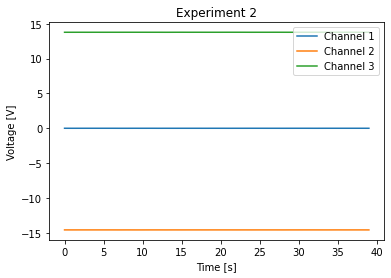

In [5]:
# Look at the results from the three different experiments
exp1Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp1.dat", sep="\t")
exp2Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp2.dat", sep="\t")
exp3Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp3.dat", sep="\t")

#Experiment 1
plt.plot(exp1Df.index, exp1Df["CH1 (V)"], label="Channel 1")
plt.plot(exp1Df.index, exp1Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp1Df.index, exp1Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Experiment 1")
plt.show()

#Experiment 2
plt.plot(exp2Df.index, exp2Df["CH1 (V)"], label="Channel 1")
plt.plot(exp2Df.index, exp2Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp2Df.index, exp2Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Experiment 2")
plt.show()

#Experiment 2
plt.plot(exp3Df.index, exp3Df["CH1 (V)"], label="Channel 1")
plt.plot(exp3Df.index, exp3Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp3Df.index, exp3Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Experiment 2")
plt.show()

Now we seek to determine the range of input (sum) voltages over which the OU150A responsds linearly. To do this, I will use the following procedure:
- Connect the 15 V power source to a potentiometer
- Wire the output of this potentiometer to *both* of the inputs to the OU150A. Therefore, we should expect the output to be double that of the absolute sum of the signal, with a flipped sign.

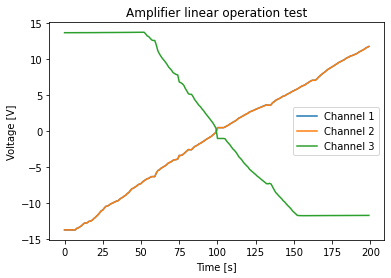

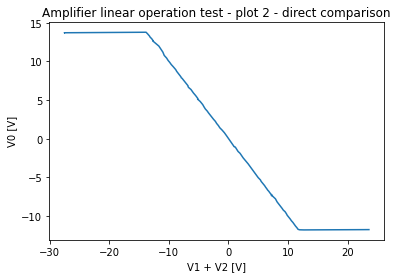

In [11]:
# Load in data files from the "cap" test, concatenate them together
capTestDfv1 = pd.read_csv("RawData/0923-OpAmp-CapTest-v1.dat", sep="\t")
capTestDfv2 = pd.read_csv("RawData/0923-OpAmp-CapTest-v2.dat", sep="\t")
capTestDf = pd.concat([capTestDfv1, capTestDfv2], ignore_index=True)

# Plot the voltages from each channel over time
plt.plot(capTestDf.index, capTestDf["CH1 (V)"], label="Channel 1")
plt.plot(capTestDf.index, capTestDf["CH2 (V)"], label = "Channel 2")
plt.plot(capTestDf.index, capTestDf["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Amplifier linear operation test")
plt.show()

# Plot the output voltage as a function of the input voltages summed
plt.plot(capTestDf["CH1 (V)"] + capTestDf["CH2 (V)"], capTestDf["CH3 (V)"])
plt.xlabel("V1 + V2 [V]")
plt.ylabel("V0 [V]")
plt.title("Amplifier linear operation test - plot 2 - direct comparison")
plt.show()


**Note**: Channel 1 cannot be seen since it has a direct overlap with Channel 2 (since they are connected to the same potentiometer output)


#### Analysis

- We observe the same clipped voltage levels as our original test: ~13.7 V (positive side), and ~11.7 V (negative side)
- From the second graph, we can see that the input clipping point is at ~-11.5 V and ~+11.5 V
    - Therefore our linear input range is [-11.5 V, 11.5 V]
    - After that the output is clipped at the previously mentioned min/max voltages

### Task 1.2

#### Procedure Used

In order to plot V1 against all of V3, V4, and (V3-V4), I set up the apparatus using the circuit diagram provided. I used the large potentiometer on the bench as the "second" potentiometer in the chain, whose output goes directly to the pre-amplifier. I slowly rotated the potentiometer through the "active" region where there was no saturation at either end.

Due to the very sensitive nature of the gain for this setup, I decreased the data update rate from 600 ms to 400 ms to take more accurate readings. Even more accurate measurements might even be beneficial here in order to calculate the gain more accurately.


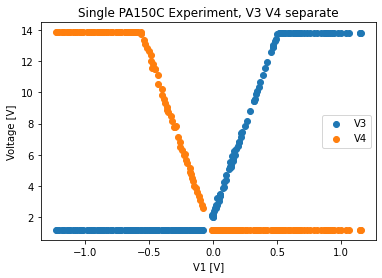

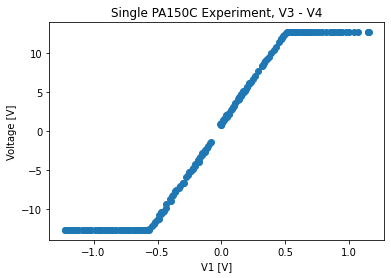

In [15]:
# Plot the data collected
pa_negative_df = pd.read_csv("RawData/09-24-Task1.2-Negative.dat", sep = "\t")
pa_positive_df = pd.read_csv("RawData/09-24-Task1.2-Positive.dat", sep = "\t")

pa_df_single = pd.concat([pa_negative_df, pa_positive_df], ignore_index = True)

plt.scatter(pa_df_single["CH1 (V)"], pa_df_single["CH2 (V)"], label = "V3")
plt.scatter(pa_df_single["CH1 (V)"], pa_df_single["CH3 (V)"], label = "V4")
plt.title("Single PA150C Experiment, V3 V4 separate")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.show()

plt.scatter(pa_df_single["CH1 (V)"], pa_df_single["CH2 (V)"] - pa_df_single["CH3 (V)"])
plt.title("Single PA150C Experiment, V3 - V4")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.show()

Using these plots, we can determine the gain of the PA150C pre-amplifier using the following relationship.

$$ Gain = (\frac{V_3 - V_4}{V_1}) $$

To do so, we just need to compute the slope of the linear portion of this graph. Lets look at a middle portion of the dataframe.

In [24]:
# Look at middle portion
print(pa_df_single[80:85])
print(pa_df_single[115:120])

# Use these values to compute rise over run
slope_estimate = ((13.8 - 1.183) - (1.195-7.142))/(0.712-(-0.278))
print("Gain Estimate: %.3f" % (slope_estimate))

    CH1 (V)  CH2 (V)  CH3 (V)
80   -0.278    1.195    7.142
81   -0.261    1.194    6.790
82   -0.257    1.190    6.497
83   -0.240    1.195    6.300
84   -0.221    1.198    6.040
     CH1 (V)  CH2 (V)  CH3 (V)
115    0.814   13.802    1.184
116    0.788   13.800    1.183
117    0.761   13.800    1.183
118    0.738   13.802    1.185
119    0.712   13.800    1.183
Gain Estimate: 18.752


After completing this experiment once, I then doubled the input signal by connecting terminals 1 and 2. I proceeded to repeat the exact same procedure, slowly rotating the potentiometer. On first glance, the output signal was doubled. We can plot the same graphs as before.

#### [ At Home Work Session: 2021-09-24 - 5:15 PM]

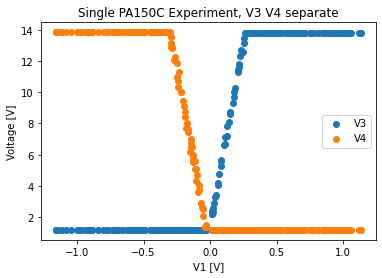

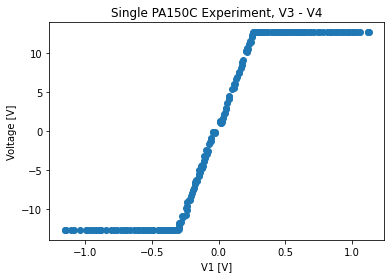

In [25]:
# Now connect channels 1 and 2 on the PA150 to double the signal
pa_negative_doubled_df = pd.read_csv("RawData/09-24-Task1.2-Negative-doubled.dat", sep = "\t")
pa_positive_doubled_df = pd.read_csv("RawData/09-24-Task1.2-Positive-doubled.dat", sep = "\t")

pa_df_double = pd.concat([pa_negative_doubled_df, pa_positive_doubled_df], ignore_index = True)

plt.scatter(pa_df_double["CH1 (V)"], pa_df_double["CH2 (V)"], label = "V3")
plt.scatter(pa_df_double["CH1 (V)"], pa_df_double["CH3 (V)"], label = "V4")
plt.title("Single PA150C Experiment, V3 V4 separate")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.show()

plt.scatter(pa_df_double["CH1 (V)"], pa_df_double["CH2 (V)"] - pa_df_double["CH3 (V)"])
plt.title("Single PA150C Experiment, V3 - V4")
plt.xlabel("V1 [V]")
plt.ylabel("Voltage [V]")
plt.show()

Visually, we can see that the linear region for V1 has been cut in half ( [-0.25 V, 0.25 V]). This is because V1 is now actually double what the graph is showing. Therefore, it appears that the gain has doubled from the previous value measured/calculated.

### Analysis

One important characteristic to note is the difference in behaviour from V3 and V4 on the output of the PA150C pre-amplifier. For negative input voltages, V3 is 0, where V4 is either clipped (past -0.5 V) or linearly decreasing as a function of V1. For positive input voltages < 0.5 V, V4 is 0 and instead V3 is linearly increasing. Past 0.5 V, V3 gets clipped.

It is only when we subtract V4 from V3 that we get this continuosly linear region between [-0.5 V, 0.5 V]. This is the region of linear operation that we want to take advantage of moving forward.

# Task 2: Tachometer Calibration

#### [ Lab Session: 2021-09-23 - 3:30 PM]

## Objective

We want to explore critical properties of the Tachometer used in this setup. Additionally, we need to identify key coefficients and the limitations of the sensor.

## Theoretical Statements to be tested

Ideally, the Tachometer produces an electrical signal proportional to the angular speed of the motor. This relationship is governed by the following equation:

$$ V_t = k_t * \frac{d\theta'}{dt} $$

## Procedure Used

- I set up the table apparatus using the diagram provided
- I noticed very quickly that the voltages I was getting from the potentiometer were from -15V to 15V, which where far too large for the motor operation (since we are saturating the pre-amplifier, which has a very small active range)
- To remedy this, I used the first potentiometer to limit the maximum voltage that the second potentiometer could offer
- To start, I set the output of the first potentiometer to 0.3V to test the forward operation of the motor
- Next, I set the output of the first potentiometer to -0.3V to test the backward operation of the motor
- In both of the above cases, I was measuring the output of the Tachometer, Vt

## Experiment Observations
- During forward operation, there were no voltages (including 0) where the motor completely stopped, however it did spin faster for larger input voltages
- During backward operation, there was a small (offset) range where the motor stopped spinning

### Important Observation that made me repeat the procedure

It took me quite awhile to find the source of this voltage offset where the motor would stop at ~-0.1 V. Ultimately, I found that there was a knob on the PA150C pre-amplifier that controlled this offset. Therefore, I re-calibrated this knob back to make sure there was no offset, and the motor was at a standstill at 0V, equally far from the points where the motor would start spinning for either the positive or negative direction.




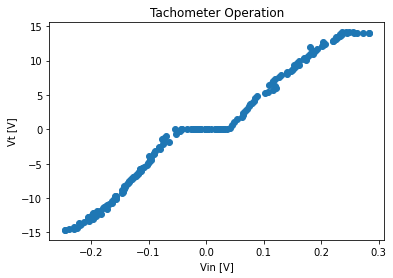

In [30]:
# First plot the output of the Tachometer, Vt as a function of the input voltage, Vin
task2_df_negative = pd.read_csv("RawData/09-24-Task2-Negative.dat", sep = "\t")
task2_df_positive = pd.read_csv("RawData/09-24-Task2-Positive.dat", sep = "\t")

task2_df = pd.concat([task2_df_negative, task2_df_positive], ignore_index = True)

plt.scatter(task2_df["CH1 (V)"], task2_df["CH2 (V)"])
plt.title("Tachometer Operation")
plt.xlabel("Vin [V]")
plt.ylabel("Vt [V]")
plt.show()

Here, we can see that Vt increases linearly for increasing voltages, except within a "deadband" region, where the motor stops spinning. Here, this region is represented by the flat portion of the curve, which corresponds to an interval of [-0.05 V, 0.05 V]. These input voltages are clearly not large enough to overcome any internal resistance the motor may be facing.

Next, to fully understand the experiment, we also conducted the same exact experiment with the input signal doubled (by connecting channels 1 and 2 on the PA150C).

[]

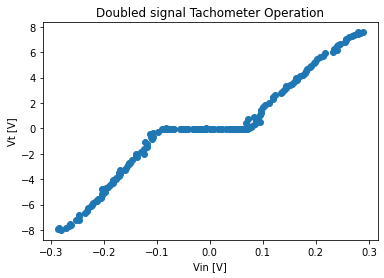

In [27]:
# Now connect channels 1 and 2 on the PA150 to double the signal
task2_df_negative = pd.read_csv("RawData/09-24-Task2-Negative-doubled.dat", sep = "\t")
task2_df_positive = pd.read_csv("RawData/09-24-Task2-Positive-doubled.dat", sep = "\t")

task2_df = pd.concat([task2_df_negative, task2_df_positive], ignore_index = True)

plt.scatter(task2_df["CH1 (V)"], task2_df["CH2 (V)"])
plt.title("Doubled signal Tachometer Operation")
plt.xlabel("Vin [V]")
plt.ylabel("Vt [V]")
plt.plot()

Interestingly, we see that doubling the input signal has the effect of increasing the bank where the motor is not running. This band has extended to [-0.1 V, 0.1 V]. We can also see that the slope of the linear portion of the curve on either side of the flat is half of what it used to be.

Following this part, I needed to determine $k_t$.

To do this, we set $V_{in}$ to various voltages (6 total measurements), and timed how long it took for the output potentiometer to fully rotate 10 times. This data is summarized below in the lists I have created.

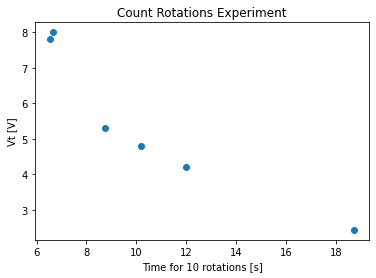

In [31]:
Vin = [0.15, 0.075, 0.107, 0.128, 0.086, 0.09]
Vt = [8, 2.44, 5.3, 7.8, 4.8, 4.2]
t = [6.66, 18.72, 8.75, 6.53, 10.18, 11.97]

revs_df = pd.DataFrame()
revs_df['t'] = t
revs_df['Vin'] = Vin
revs_df['Vt'] = Vt

plt.scatter(revs_df["t"], revs_df["Vt"])
plt.xlabel("Time for 10 rotations [s]")
plt.ylabel("Vt [V]")
plt.title("Count Rotations Experiment")
plt.show()

#### [ At Home Work Session: 2021-09-28 - 11:00 AM]

In order to calcuate $k_t$, I first need to convert the quantity of interest to rotations per second. This will become the x-axis. Then the slope of this line will be equal to $k_t$.



Slope (k_t): 0.876


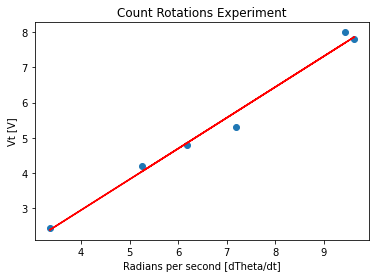

In [32]:
# convert to radians per second which represents dtheta/dt
revs_per_second = list(map(lambda x: 10/x, t))
rads_per_second = list(map(lambda x: 2*math.pi*x, revs_per_second))

plt.scatter(rads_per_second, revs_df["Vt"])

best_fit_line_coeffs = np.polyfit(rads_per_second, revs_df["Vt"], 1)

print("Slope (k_t): %.3f" % best_fit_line_coeffs[-2])

plt.plot(rads_per_second, np.poly1d(best_fit_line_coeffs)(rads_per_second), color = "r")
plt.xlabel("Radians per second [dTheta/dt]")
plt.ylabel("Vt [V]")
plt.title("Count Rotations Experiment")
plt.show()


# Task 3: Motor Transient Response

## Objective

Here, we want to determine appropriate constants for our equations of motion by plotting the input signal over time as well as the motor response via the Tachometer.

## Theoretical Statements to be Tested

For our rotational system, we can define the equation of motion describing the operation with

$$ \frac{d^2 \theta}{dt^2} + c \frac{d \theta}{dt} = k_m V_{in} $$

We can solve this differential equation, and solve for $ V_t $ to get:

$$ V_t = \frac{-k_t k_m V_{in}}{30c} (1 - e^{-ct}) $$

## Procedure used

To do this I set up the circuit as shown in Figure 2.4.

I chose the following parameters for amplitude and frequency of the square wave input from Channel A:
- Amplitude: 0.3 V
- Period: 4 s

The amplitude parameter was chosen to make sure we are getting the full range of the possible input voltages to the motor. The period parameter was chosen because the $ V_t $ value nearly stabilized after going through a square wave cycle. 

I would note that if I were to perform this experiment again, I would like to increase the period, or decrease the amplitude so that the $ V_t $ signal gets a bit more flat, but for the purposes of this experiment my measurements should be sound.


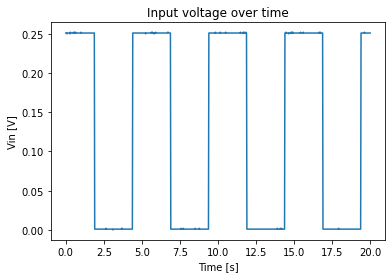

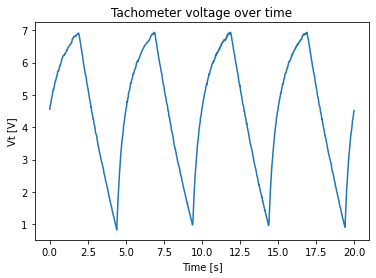

In [34]:
task3_df = pd.read_csv("RawData/09-24-Task3.dat", sep = "\t")
task3_df

plt.plot(task3_df["Time (S)"], task3_df["CHA (V)"], label = "Channel A")
plt.xlabel("Time [s]")
plt.ylabel("Vin [V]")
plt.title("Input voltage over time")
plt.show()

plt.plot(task3_df["Time (S)"], task3_df["CH1 (V)"], label = "V_t")
plt.xlabel("Time [s]")
plt.ylabel("Vt [V]")
plt.title("Tachometer voltage over time")
plt.show()

To solve for $ k_m $ and $ c $, I first define another constant - lets call it a:

$$ a = \frac{-k_t k_m V_{in}}{30c} $$

such that

$$ V_t = a(1-e^{-ct}) $$

Solve for a by looking at the maximum value reached.

Note that since the input signal was doubled when taking measurements, the V_in will actually be double what was reached, and therefore our measured value for a will be twice as large. We will adjust this by dividing by 2.

In [238]:
# Solve for a by looking at the maximum value reached.

a = task3_df["CH1 (V)"].max()/2
print("a:",a)

a: 3.4695


Then, solving for c:

$$ \frac{V_t}{a} = 1-e^{-ct} $$

$$ -log(\frac{a - V_t}{a}) = ct $$

Using this equation, we can see that it is of the form $ y = m*x $, where $ y = -log(\frac{a - V_t}{a}) $ and $ x = t $

Lets plot this.

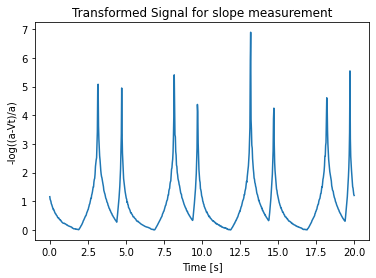

In [39]:
task3_df["logSlopeMeasurement"] = task3_df["CH1 (V)"].apply(lambda x: -math.log(abs(a-x)/a))

plt.plot(task3_df["Time (S)"], task3_df["logSlopeMeasurement"], label = "V_t")
plt.xlabel("Time [s]")
plt.ylabel("-log((a-Vt)/a)")
plt.title("Transformed Signal for slope measurement")
plt.show()

We can see that this plot would be much easier to understand if we looked at a single period of rotation.

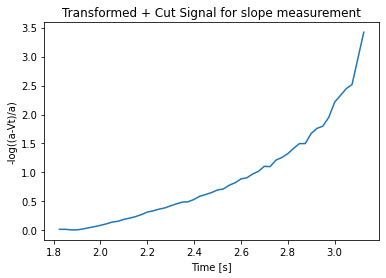

C = 2.0152881285364996


In [42]:
from scipy.stats import linregress
df_cut = task3_df[(task3_df["Time (S)"] > 1.8) & (task3_df["Time (S)"] < 3.15) ]

plt.plot(df_cut["Time (S)"], df_cut["logSlopeMeasurement"], label = "V_t")
plt.xlabel("Time [s]")
plt.ylabel("-log((a-Vt)/a)")
plt.title("Transformed + Cut Signal for slope measurement")
plt.show()

# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(df_cut["Time (S)"], df_cut["logSlopeMeasurement"])

# The slope value of our linear regression will represent 
print('C =', slope)

Now, using our values, we can simply plug in these values into our equation, and solve for $ k_m $.

$$ a = \frac{-k_t k_m V_{in}}{30c} $$

$$ k_m = \frac{-30 a c}{k_t V_{in}} = \frac{-30*3.4695*2.015}{0.876 * 0.25/2} = -1915.35 $$

# Task 4: Closed Loop Speed Control

#### [ Lab Session: 2021-10-12 - 3:30 PM]

## Objective

To examine the operation of the circuit to control the speed of the servo motor. Here the speed will be based on the reference voltage set by the input potentiometer.

## Theoretical Statements to be Tested

This is the first task in this lab where we will be "closing the loop" of the system, such that the speed of the motor can be controlled by monitoring the difference between the reference voltage, $ V_r $, and the actual motor speed, represented by $V_t$. In this way, the system is able to maintain a constant speed

If $ V_t < -V_r $, then power will be suppled to the motor to decrease the magnitude of the error signal, which is calculated as $ V_t + V_r $. When this error is zero, the motor will maintain the current speed or angular velocity.

## Procedure used

### Task 1: 

I set up the circuit as shown in Figure 2.5. Here the major change lies in what the error signal is calculating. Now, the OU150A is calculating the difference between the input potentiometer, and the tachometer output, which is proportional to the speed of the motor.

I then connected the measurement inputs to the reference voltage, $V_r$, as well as the Tachometer output, $V_t$.

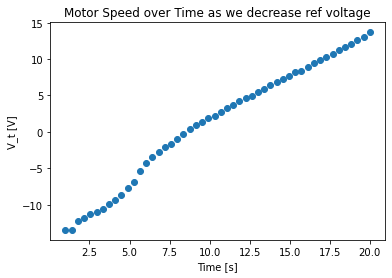

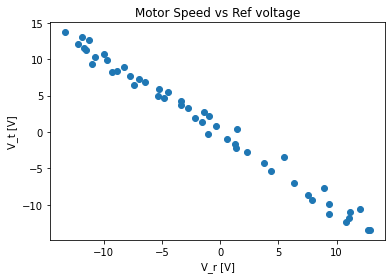

In [73]:
# Task 1
task4_part1_df = pd.read_csv("RawData/1012/10-12-task4-v1-good.dat", sep = "\t")

# Plot motor speed over time
plt.scatter(np.linspace(1,20, task4_part1_df.shape[0]), task4_part1_df["CH1 (V)"])
plt.xlabel("Time [s]")
plt.ylabel("V_t [V]")
plt.title("Motor Speed over Time as we decrease ref voltage")
plt.show()

# Plot V_t vs V_r
plt.scatter(task4_part1_df["CH3 (V)"], task4_part1_df["CH1 (V)"])
plt.xlabel("V_r [V]")
plt.ylabel("V_t [V]")
plt.title("Motor Speed vs Ref voltage")
plt.show()

Here, we can see that the Tachometer output, $V_t$ is inversely proportional to the reference voltage, $V_r$. Based on our understanding this makes sense. As $V_r$ decreases, $V_t$ will need to get larger to bring the error back to 0.

### Task 2

Using the same setup as before, I simply added the Eddy brake to the system.

During measurements I went through two complete cycles of applying the eddy brake and then pulling it back off of the system. I will measure the error signal as the *absolute* difference between our two channel measurements.

Text(0.5, 1.0, 'Eddy brake affecting error signal')

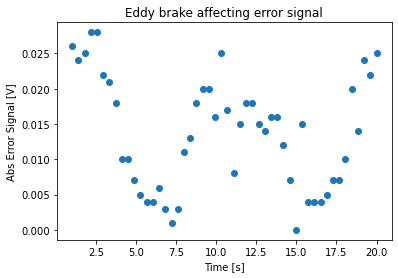

In [83]:
# Task 2
task4_part2_df = pd.read_csv("RawData/1012/10-12-task4-v2.dat", sep = "\t")

# 20 second measurement time -> 50 measurements * 400 ms capture time
plt.scatter(np.linspace(1,20,task4_part2_df.shape[0]), abs(task4_part2_df["CH2 (V)"] + task4_part2_df["CH3 (V)"]))
plt.xlabel("Time [s]")
plt.ylabel("Abs Error Signal [V]")
plt.title("Eddy brake affecting error signal")

#### [ At Home Work Session: 2021-10-13 - 9:00 AM]

Due to the absolute differences being very small throught the measurement period, our data is rather noisy. However, we can see quite clearly that the absolute error goes through two distinct cycles.

At the beginning of the experiment I did not have the Eddy brake applied, so the error is large. As I apply the Eddy brake, the size of the error reduces (until about 0 when the motor is close to standstill). Then as I pulled the Eddy brake back off of the motor, the size of the error begins to increase again. I go through this cycle one additional time, but the pattern remains the same.

There appears to be a correlation between the size of the error signal and the motor speed.
- Motor speed increase = error signal increase

### Task 3

Here, I am simply swapping or reversing the Tachometer signal, $V_t$.

I took measurement for this part by starting our reference voltage at 0, then slowly decreasing it to its max value (-15 V), before slowly increasing it back to 0 V.

Text(0.5, 1.0, 'Tachometer Voltage over Time')

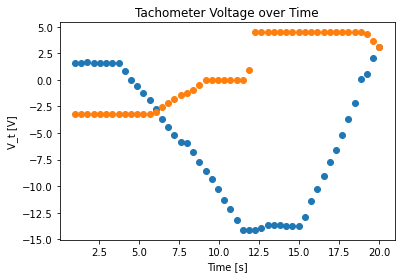

In [89]:
# Task 3
task4_part3_df = pd.read_csv("RawData/1012/10-12-task4-v3.dat", sep = "\t")

plt.scatter(np.linspace(1,20,task4_part2_df.shape[0]), task4_part3_df["CH1 (V)"])
plt.scatter(np.linspace(1,20,task4_part2_df.shape[0]), task4_part3_df["CH3 (V)"])
plt.xlabel("Time [s]")
plt.ylabel("V_t [V]")
plt.title("Tachometer Voltage over Time")

#### [ At Home Work Session: 2021-10-13 - 9:00 AM]

Note: Upon reading my data file for this part of the Task 4, I noticed that the readings for my reference voltage were a bit choppy, but I do still think it is accurate enough to analyze.

Here we must keep in mind that the Tachometer signal, $V_t$, is actually reading opposite what is happening on the test setup. Therefore, positive voltages actually mean it is spinning in the negative direction.

Working through the data points, we can see the following things occur:
1. $V_r$ starts at -2.7 V, motor has positive voltage so spinning in negative direction (reversed $V_t$ = 2.5 V)
    - To correct, the system wants increase $V_t$
    - However, sending more power to the motor will make the non-reversed negative signal of $ V_t $ get closer to 0
    - This will make the reversed positive signal of $V_t$ get smaller
    - As $V_t$ gets smaller, the error will **increase**, meaning the system will try even harder to correct, thus further increasing.
2. We can see that $ V_t $ goes all the way to it negative limit
3. $ V_r $ is increase to 5 V, motor has negative voltage so is actually spinning in positive direction
    - For the same reasons as in step 1, the motor signal will try to correct, but will instead read the error as increasing

**Conclusion**: Our original system included a negative feedback signal that allowed the system to correct for discrepancies between the reference voltage and the motor voltage. By reversing $ V_t$ this system instead represents a **positive** feedback loop where the system corrects by making the error larger, further increasing the need to correct. This is not what we want.

# Task 5: Closed Loop Position Control

#### [ Lab Session: 2021-10-12 - 3:30 PM]

## Objective

Now instead of controlling the speed of the motor using the potentiometer, we try to control the *position* of the motor. We will measure how the system does this, including any constant terms in the operation.

## Theoretical Statements to be Tested

I set up the testing bench to represent Figure 2.6. Here, we have disconnected the Tachometer from the apparatus, and the error signal is now calculated by looking at the difference between the input potentiometer and the output potentiometer.

With that in mind, the input to the PA150C should be

$$ V_{in} = -(V_r + V_p)*r_1 $$

where $r_1$ represents a constant which scales the error signal (implemented using potentiometer).

Additionally, another constant factor $k_p$ is introduced as a scaling constant between the output angle of the motor shaft and the output voltage, $V_p$, that is used in the error signal calculation. The relationship is:

$$ V_p = k_p \theta $$

## Part 1

Test that the position of the input potentiometer can control the position of the output potentiometer. I will do this by simply moving the input potentiometer slightly, and seeing how the output potentiometer responsds

Observations:
- There appears to be a "dead zone" on the output potentiometer where the voltage values read are incorrect
- We suspect this to be because the potentiometer inside has reached it's maximum value
- Control appears to be "out of control", does not appear to be trying to get to the correct location
- We suspect it is because of the "dead zone"

What we learned:
- Fixed the issues we were having by doing the following:
    1. Kept the input signals away from the "dead zone" (kept them suitably small)
    2. Discovered that our positive and negative terminals on the output pot were causing a positive feedback signal
        - Switched these and operation now appears normal

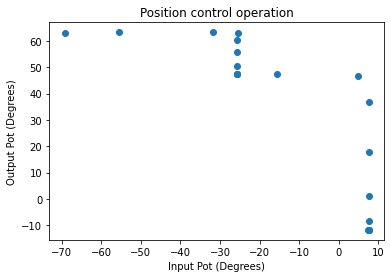

In [97]:
task5_part1_df = pd.read_csv("RawData/1012/10-12-task5-good-good.dat", sep = "\t")

plt.scatter(task5_part1_df["IPot (Deg)"], task5_part1_df["OPot (Deg)"])
plt.xlabel("Input Pot (Degrees)")
plt.ylabel("Output Pot (Degrees)")
plt.title("Position control operation")
plt.show()

It is important to note that this measurement only lasted ~5 seconds. With that in mind, we can see quite clearly that the output pot does respond to the change in the input pot, but there is a slight time delay. This can be seen since multiple output pot measurements appear in vertical lines, meaning the output pot took on different values when the input pot was not changing. 

We can confirm this hypothesis by plotting their operation over time.

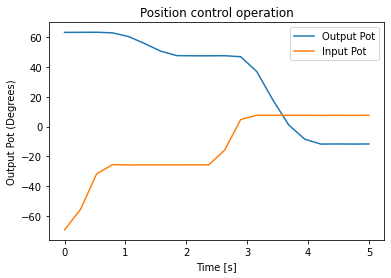

In [110]:
plt.plot(np.linspace(0,5,task5_part1_df.shape[0]), task5_part1_df["OPot (Deg)"], label = "Output Pot")
plt.plot(np.linspace(0,5,task5_part1_df.shape[0]), task5_part1_df["IPot (Deg)"], label = "Input Pot")
plt.xlabel("Time [s]")
plt.ylabel("Output Pot (Degrees)")
plt.title("Position control operation")
plt.legend()
plt.show()

Using this plot, it is very clear that:
1. The input angle and the output angle are inversely proportional (i.e. input of -10 degrees -> output of +10 degrees)
2. There is a slight delay between moving the input pot, and observing movement in the output pot

## Part 2/ Part 4

Here, I will try to adjust the setup such that we can see three distinct modes of operation (or types of damping):
- Critical damping
- Overdamping (Note: Unfortunately I do not have an example with the square wave $V_r$, however I do have any example using the manual input pot)
- Underdamping

Each case will be plotted and observed, and then discussed at the end.

Here I will test the effect that $P_1$ has on the system in two ways:
1. Using our input potentiometer -> try to find a resistance level where the output does not respond to the input (Overdamping)
2. After applying the 2 V peak-to-peak square wave (period = 3.0s), find two cases:
    1. Appropriate tuning
    2. Underdamping case where the error signal is **not scaled enough** (too large)

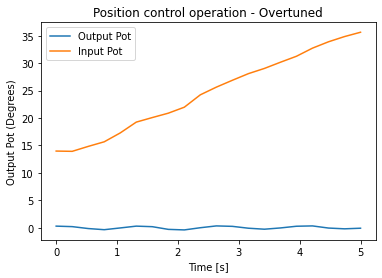

In [206]:
# Over-tuned case using input pot
task5_part2_df = pd.read_csv("RawData/1012/10-12-task5-turning-pot.dat", sep = "\t")

plt.plot(np.linspace(0,5,task5_part2_df.shape[0]), task5_part2_df["OPot (Deg)"], label = "Output Pot")
plt.plot(np.linspace(0,5,task5_part2_df.shape[0]), task5_part2_df["IPot (Deg)"], label = "Input Pot")
plt.xlabel("Time [s]")
plt.ylabel("Output Pot (Degrees)")
plt.title("Position control operation - Overtuned")
plt.legend()
plt.show()


As expected, we scaled the error signal down so much that it does not send a suitably large signal to adjust. Under-tuned case.

Next, we decreased the scaling factor to a more appropriate level, and applied the square wave input.

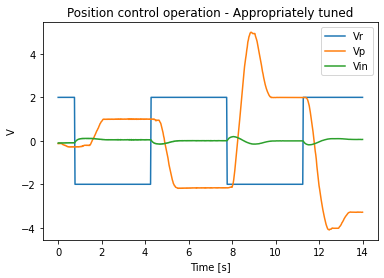

r_1 = 0.04432954202902151


In [224]:
# Appropriately tuned using square wave
task5_part2_df = pd.read_csv("RawData/1012/10-12-task5-part2-v1.dat", sep = "\t")
t = task5_part2_df["Time (S)"]
Vr = task5_part2_df["CHA (V)"]
Vin = task5_part2_df["CH2 (V)"]
Vp = task5_part2_df["CH3 (V)"]

plt.plot(t, Vr, label = "Vr")
plt.plot(t, Vp, label = "Vp")
plt.plot(t, Vin, label = "Vin")
plt.xlabel("Time [s]")
plt.ylabel("V")
plt.title("Position control operation - Appropriately tuned")
plt.legend()
plt.show()

# Determine r_1
# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(-1*(Vr + Vp), Vin)

# The slope value of our linear regression will represent 
print('r_1 =', slope)

Here, we can see that the output potentiometer voltage, $V_p$ responds to the change in $V_r$. We do see *some* overshoot, but the signal does typically manage to make it to the appropriate position.

Using our relationship $V_{in} = -(V_r + V_p)*r_1 $ we can also perform a linear regression to solve for our coefficient $r_1$. We find that 

$$ r_1 = 0.044 $$

for critical damping

Finally, we changed the scaling factor on $P_1$ such that the error signal was **not scaled down enough**, meaning the error signals were too large.

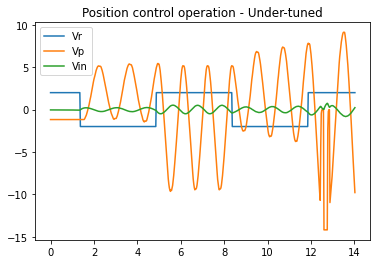

r_1 = 0.05671742883807835


In [223]:
# Undertuned case
task5_part2_df = pd.read_csv("RawData/1012/10-12-task5-part2-overshoot.dat", sep = "\t")
t = task5_part2_df["Time (S)"]
Vr = task5_part2_df["CHA (V)"]
Vin = task5_part2_df["CH2 (V)"]
Vp = task5_part2_df["CH3 (V)"]

plt.plot(t, Vr, label = "Vr")
plt.plot(t, Vp, label = "Vp")
plt.plot(t, Vin, label = "Vin")
plt.title("Position control operation - Under-tuned")
plt.legend()
plt.show()

# Determine r_1

# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(-1*(Vr + Vp), Vin)

# The slope value of our linear regression will represent 
print('r_1 =', slope)

Now we can see that the system appears to be very unstable. The output potentiometer is not able to get to the proper position before the next change in $V_r$ makes it adjust again. We see unstably increasing errors rather than a damped wave converge onto the correct position.

Here, our $r_1$ value has increased to $ r_1 = 0.057 $

#### [ At Home Work Session: 2021-10-14 - 5:05 PM]

### Part 2 Conclusion:
 Adjusting the potentiometer $P_1$ controls the size of the error signal and in turn the response of the system. Little scaling will produce larger errors that attempt to correct *faster*, but more unstably. Larger scaling will produce smaller errors that take longer to adjust, but are usually more stable. We should be careful, however, not to adjust *too* much, or the error will not be large enough to make the system adjust (over-tuned case).

 In the future, I think a better measurement to see this behaviour would be to take measurements *while* changing $P_1$. This way I could get a larger spectrum to base my observations on.

### Part 4 Conclusion:

Here, I have showed the three different types of damping that we can obtain with this setup.

#### Overdamping Case
- More $P_1$ error scaling -> smaller error signal
- Position does not fully reach the set point (because error probably too small)

#### Underdamping Case
- Less $P_1$ error scaling -> larger error signal
- Too much oscillation around the correct position -> this could be fixed by adding our derivative component to our system

#### Critical Damping Case
- Correct tuning
- Small, controlled oscillations to get to final position
- Gets to correct position in a timely manner, before the beginning of the next oscillation

## Part 3

First, I can use the same experiment that we used in Part 1 to calculate the constant $k_p$. We can do this by plotting $V_p$ against $\theta$, and measuring the slope of the line.

$$ V_p = k_p \theta $$

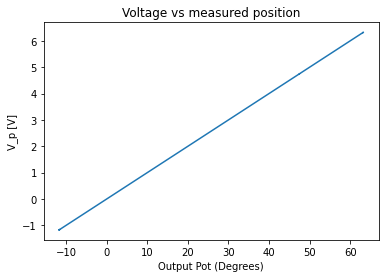

K_p: 0.1


In [128]:
# Plot relationship
plt.plot(task5_part1_df["OPot (Deg)"], task5_part1_df["CH3 (V)"])
plt.ylabel("V_p [V]")
plt.xlabel("Output Pot (Degrees)")
plt.title("Voltage vs measured position")
plt.show()

# Measure slope
k_p = (task5_part1_df["CH3 (V)"].iloc[-1] - task5_part1_df["CH3 (V)"].iloc[0])/(task5_part1_df["OPot (Deg)"].iloc[-1] - task5_part1_df["OPot (Deg)"].iloc[0])
print("K_p:", k_p)

In addition to $K_p$, we can also write the rest of the equation of motion in terms of the variables we have here.

- To begin, we can rewrite down the solution to the differential equation governing this system

$$ \frac{d\theta}{dt} = \frac{k_m V_{in}}{c} (1 - e^{-ct}) $$

- Replace $V_{in}$ with its new formula $V_{in} = -(V_r + V_p)*r_1$, and in our case $V_A = V_r$

$$ \frac{d\theta}{dt} = \frac{-k_m (V_A + V_p)*r_1}{c} (1 - e^{-ct}) $$

- Finally, replace $V_p$ with $V_p = k_p \theta $

$$ \frac{d\theta}{dt} = \frac{-k_m (V_A + k_p \theta )*r_1}{c} (1 - e^{-ct}) $$

Now we have the solution in terms of our variables and constants of interest.

# Task 6: Closed Loop with Position and Velocity Feedback

#### [ Lab Session: 2021-10-12 - 3:30 PM]

## Objective

In Task 5, we tuned our parameter $r_1$ to get a system that is essentially critically damped (or close to). What we found however was that even for this optimally tuned system, there was still a considerable overshoot before the position properly converged.

By adding a "derivate" component (using velocity feedback), we can solve this problem by adjusting for our rate of change, and thus allowing us to eliminate this slight overshoot.

In this task, we want to add this velocity feedback, and determine if we can create a stable system. In addition, we are trying to solve for the best value of $r_3$ and $r_4$ that product the best system.

Finally, we will also observe the different modes of damping with the velocity feedback component.

## Theoretical Statements to be Tested (Part 2)

We can write our $V_{in}$ as the sum of our proportional control from Task 5 and the additional derivative term we are now adding.

$$ V_{in} = -(V_r + V_p)*r_3 + V_t r_4 $$

where $V_p = k_p \theta $ and $V_t = k_t \frac{d\theta}{dt} $

Replace these in the $ V_{in} $ equation to get

$$ V_{in} = -(V_r + k_p \theta)*r_3 + k_t \frac{d\theta}{dt} r_4 $$

Finally, plugging this back into our original equation of motion 

$$ \frac{d\theta}{dt} = \frac{k_m V_{in}}{c} (1 - e^{-ct}) $$

we get 

$$ \frac{d\theta}{dt} = \frac{-k_m (V_r + k_p \theta)*r_3 + k_t \frac{d\theta}{dt} r_4}{c} (1 - e^{-ct}) $$

## Part 1/Part 4

I will be using a square wave with amplitudes [-1 V, 1 V] and a period of 2s for $ V_r $.

Once again, we can observe how the angular position tracks the square wave applied by looking at three separate cases:
1. Overdamped
2. Underdamped
3. Critically damped

As we go through each case, I will monitor how the angular position tracks the reference voltage (Part 1), as well as measure the $r_3$ and $r_4$ values along the way.

### Measuring $r_3$ and $r_4$

As I stated earlier

$$ V_{in} = -(V_r + V_p)*r_3 + V_t r_4 $$

Using this we can vary the parameters of interest, and monitor how $V_{in} changes.

I can measure $r_3$ using the same method used in Task 5 to measure $r_1$. This means I will plot $V_{in} against $ -(V_r + V_p) $ for each damping case and solving for the slope using linear regression.

I can measure $r_4$ using a plot of $V_{in}$ against $V_t$, and once again using a linear regression and finding the slope of the line.

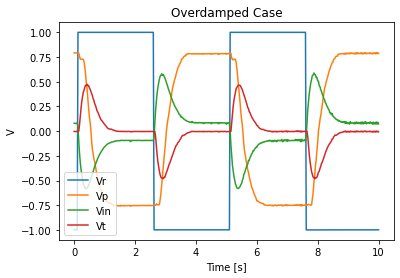

r_3 = 0.30812034116114473
r_4 = -1.280478506701568


In [234]:
# Overdamped
task6_overdamped_df = pd.read_csv("RawData/1012/10-12-task6-perfect.dat", sep = "\t")

t = task6_overdamped_df["Time (S)"]
Vr=task6_overdamped_df["CHA (V)"]
Vp=task6_overdamped_df["CH3 (V)"]
Vin=task6_overdamped_df["CH1 (V)"]
Vt=task6_overdamped_df["CH2 (V)"]

plt.plot(t, Vr, label = "Vr")
plt.plot(t, Vp, label = "Vp")
plt.plot(t, Vin, label = "Vin")
plt.plot(t, Vt, label = "Vt")
plt.xlabel("Time [s]")
plt.ylabel("V")
plt.title("Overdamped Case")
plt.legend()
plt.show()

# Measure r
# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(-1*(Vr + Vp), Vin)

# The slope value of our linear regression will represent 
print('r_3 =', slope)

# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(Vt, Vin)

# The slope value of our linear regression will represent 
print('r_4 =', slope)


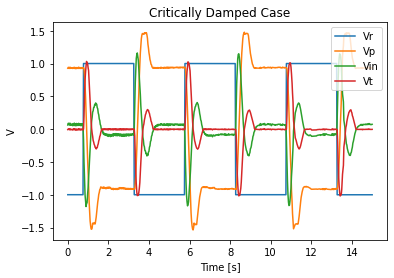

r_3 = 0.5241718334480487
r_4 = -1.0936259428946569


In [235]:
# Critically Damped
task6_crit_df = pd.read_csv("RawData/1012/10-12-task6-crit.dat", sep = "\t")

t = task6_crit_df["Time (S)"]
Vr=task6_crit_df["CHA (V)"]
Vp=task6_crit_df["CH3 (V)"]
Vin=task6_crit_df["CH1 (V)"]
Vt=task6_crit_df["CH2 (V)"]

plt.plot(t, Vr, label = "Vr")
plt.plot(t, Vp, label = "Vp")
plt.plot(t, Vin, label = "Vin")
plt.plot(t, Vt, label = "Vt")
plt.xlabel("Time [s]")
plt.ylabel("V")
plt.title("Critically Damped Case")
plt.legend()
plt.show()


# Measure r
# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(-1*(Vr + Vp), Vin)

# The slope value of our linear regression will represent 
print('r_3 =', slope)

# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(Vt, Vin)

# The slope value of our linear regression will represent 
print('r_4 =', slope)

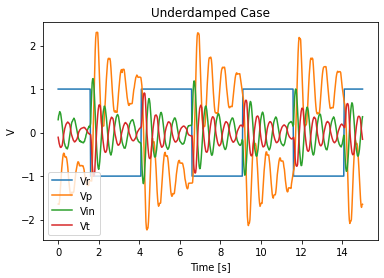

r_3 = 0.4144682287735113
r_4 = -1.1849496264942796


In [237]:
# Overdamped
task6_underdamped_df = pd.read_csv("RawData/1012/10-12-task6-under.dat", sep = "\t")

t = task6_underdamped_df["Time (S)"]
Vr=task6_underdamped_df["CHA (V)"]
Vp=task6_underdamped_df["CH3 (V)"]
Vin=task6_underdamped_df["CH1 (V)"]
Vt=task6_underdamped_df["CH2 (V)"]

plt.plot(t, Vr, label = "Vr")
plt.plot(t, Vp, label = "Vp")
plt.plot(t, Vin, label = "Vin")
plt.plot(t, Vt, label = "Vt")
plt.xlabel("Time [s]")
plt.ylabel("V")
plt.title("Underdamped Case")
plt.legend()
plt.show()

# Measure r
# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(-1*(Vr + Vp), Vin)

# The slope value of our linear regression will represent 
print('r_3 =', slope)

# Find slope of this curve using linear regression
slope, intercept, r, p, se = linregress(Vt, Vin)

# The slope value of our linear regression will represent 
print('r_4 =', slope)

## Observations (Part 1 Conclusion)
- The angular position tracks the reference voltage applied by trying to get as close to it as possible
- We require proper tuning to make sure that the signal:
    a) reaches the set voltage
    b) is stable (not oscillatory) once it gets there
- Operation appears to be the same regardless of whether or not the reference voltage is negative/positive. By this I don't mean the set point doesn't change, but the waveform patter to *reach* the set point is rather constant.



### Part 4 Conclusion

## Part 3